# Big Picture 
- Get the data set (pairs of input and labels).
- Forward pass: input -> function (model) -> output (prediction) <-> label to compute the loss. 
- Compute the loss
- Backward pass (i.e. back propagation)
- Update the parameters (i.e. weights and biases) 

In [11]:
from pathlib import Path 
import requests

# Get the data set 
DATA_PATH = Path('data') 
PATH = DATA_PATH / 'mnist'

PATH.mkdir(parents=True, exist_ok=True) 

URL = URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = 'mnist.pkl.gz'

if (not (PATH / FILENAME).exists()):
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open('wb').write(content) 

import pickle
import gzip 

with gzip.open((PATH / FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

    print('weights = pixels', 28, (28 * 28))
    print(x_train.shape)
    print(y_train.shape) 

weights = pixels 28 784
(50000, 784)
(50000,)


tensor(2)


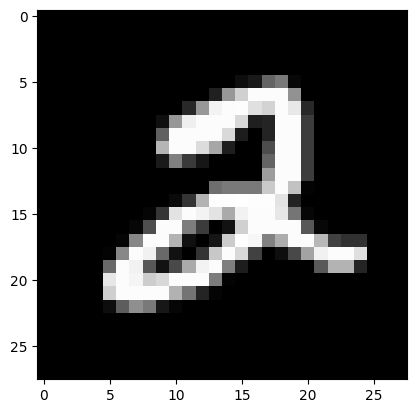

In [39]:
import matplotlib.pyplot as plt
import numpy as np 

# examine the dataset 

plt.imshow(x_train[5].reshape((28, 28)), cmap='gray')
print(y_train[5])

In [40]:
import torch
import math 

# Turn NumPy Arrays to PyTorch Vector Tensors 
x_train, y_train, x_valid, y_valid = map(torch.clone, (x_train, y_train,
                                                        x_valid, y_valid)) 

# Initialize weights and biases (i.e. parameters) 
# NN architecture: input -> hidden -> hidden -> output 
# # of neurons in the input layer: 784 (28 * 28); output layer: 10 
# (10, 784) * (784, 50000) -> w * x + b 
# (50000, 784) * (784, 10) -> x * w + b

torch.manual_seed(0) # create the same random numbers 
weights = torch.randn(784, 10) / math.sqrt(784) # Xavier initialization 
weights.requires_grad_() # in-place only when used _ < - saves a lot of memory when using in place
biases = torch.zeros(10, requires_grad=True) 


- numpy: is a really cool library for use in scientific and numerical computing research. 
- numpy array - multidimensional table of data - 2d, 3d, n... dimensional data.
- when all the elements in an array is of simple type - like integer or float; numpy will store it as a compact c data structure in memory. It can run computations on the data at the same speed as optimize C code. 
- pytorch tensors are almost the same as numpy arrays - but: there are some restrictions that make it more performant. 
- Restrictions: A tensor can't be of any type - it has to be a single basic numeric type for all elements - it also has to be rectangular in shape. 
- Tensors can utilize GPUs and are optimized for computation in GPUs 
- Pytorch implements Autograd - automatically can compute gradients (derivates) of an operation we do on tensors.

In [42]:
# Define the model: input -> model -> output 
# (50000, 784) -> (... * 64, 784)

# @ the at sign is matrix multiplication operator

def model(xb): 
    return xb @ weights + biases  

In [1]:
# Loss Function -> 10 <-> label ('5' -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
# (64, 10) 

def soft_max(x): # (e^x_i) / sum(e^x_j)
    return x.exp() / x.exp().sum(-1).unsqueeze(-1) 

def cross_entropy_loss(pred, targets):
    bs, out_features = pred.shape
    one_hot_encoded_targets = torch.eye(out_features)[targets]
    # - 1 / n sum p * log(q) -> n = bs 
    return -(one_hot_encoded_targets * soft_max(pred).log()).sum() / bs 
    
print(soft_max(model(x_train)))

NameError: name 'model' is not defined